<a href="https://colab.research.google.com/github/AnnaVashuk/my_ml_works/blob/main/%D0%B8%D0%B8_%D0%BB%D0%B0%D0%B1%D0%B0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
import statsmodels.stats.api as sms

In [ ]:
df = pd.read_csv('~/forestfires.csv')

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [ ]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

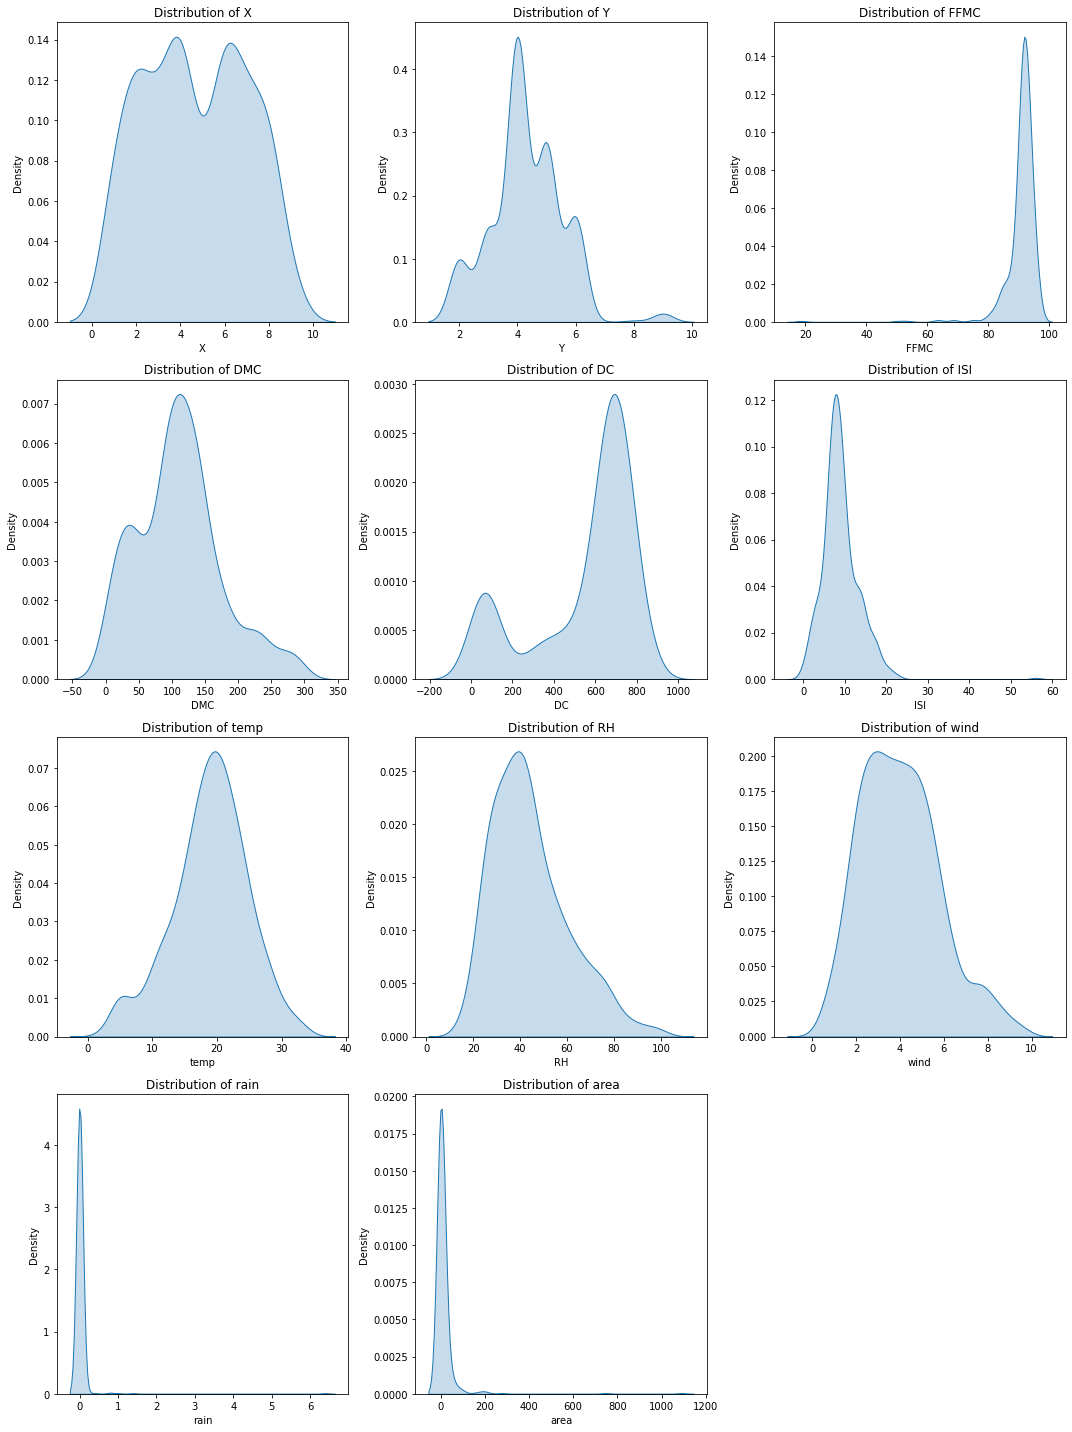

In [ ]:
columns_to_plot = [col for col in df.columns if col not in ['month', 'day']]

num_cols = 3
num_rows = (len(columns_to_plot) - 1) // num_cols + 1

plt.figure(figsize=(15, 20))

for i, column in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols, i+1)
    sns.kdeplot(data=df[column], shade=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()

plt.show()

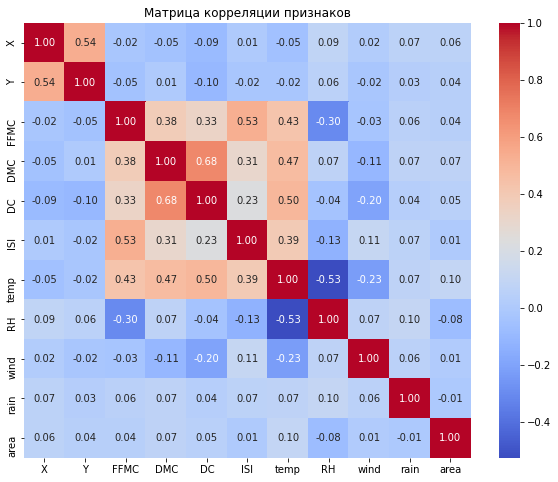

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Матрица корреляции признаков')
plt.show()

In [ ]:
cat_cols = ['month', 'day']

encoder = OneHotEncoder(sparse=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(df[cat_cols]))
encoded_cols.columns = encoder.get_feature_names(cat_cols)
df = df.drop(cat_cols, axis=1)

df_encoded = pd.concat([df, encoded_cols], axis=1)
df_encoded = pd.DataFrame(df_encoded)

df_encoded.head()

/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-vashukova-29/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
def remove_outliers_iqr(df):
    columns_to_process = df.columns[:11]

    for column_name in columns_to_process:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df

filtered_df = remove_outliers_iqr(df_encoded)

In [ ]:
filtered_df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,8,6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,8,6,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


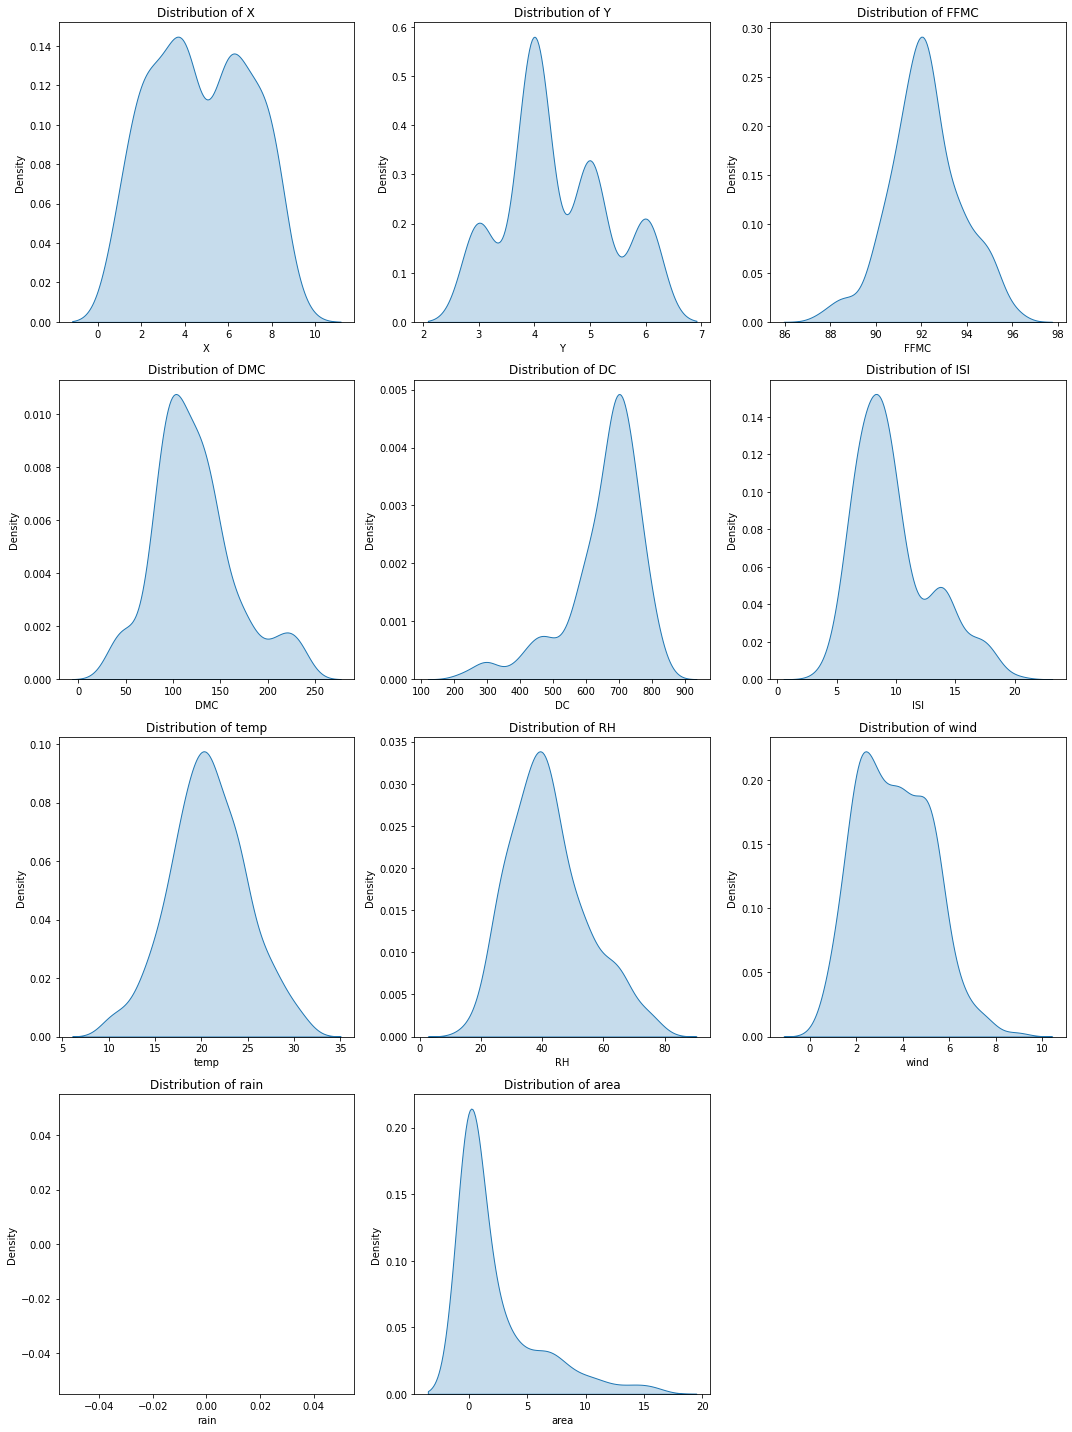

In [ ]:
num_cols = 3
num_rows = (11 - 1) // num_cols + 1

plt.figure(figsize=(15, 20))

for i, column in enumerate(filtered_df.columns[:11]):
    plt.subplot(num_rows, num_cols, i+1)
    sns.kdeplot(data=filtered_df[column], shade=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [ ]:
X = filtered_df.drop(['area'], axis=1)
y = filtered_df['area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Метрика RMSE на тестовых данных:", rmse)

Метрика RMSE на тестовых данных: 3.8091228898905993


In [ ]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF Results:")
print(vif)

VIF Results:
     Features       VIF
0           X  1.198944
1           Y  1.340098
2        FFMC  2.671798
3         DMC  3.101916
4          DC  8.585305
5         ISI  2.578625
6        temp  2.851929
7          RH  2.437894
8        wind  1.141221
9        rain       NaN
10  month_apr       NaN
11  month_aug       inf
12  month_dec       NaN
13  month_feb       NaN
14  month_jan       NaN
15  month_jul       inf
16  month_jun       inf
17  month_mar       NaN
18  month_may       NaN
19  month_nov       NaN
20  month_oct       inf
21  month_sep       inf
22    day_fri       inf
23    day_mon       inf
24    day_sat       inf
25    day_sun       inf
26    day_thu       inf
27    day_tue       inf
28    day_wed       inf


/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-vashukova-29/.local/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-vashukova-29/.local/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
residuals = y_train - model.predict(X_train)

bp_test = sms.het_breuschpagan(residuals, X_train)
print("Breusch-Pagan test p-value:", bp_test[1])

Breusch-Pagan test p-value: 0.9949499271117371


In [ ]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)
selected_features = selector.support_
feature_ranks = selector.ranking_

selected_columns = X_train.columns[selected_features]
print("Отобранные признаки:", selected_columns)

Отобранные признаки: Index(['month_jul', 'month_jun', 'month_oct', 'day_mon', 'day_thu'], dtype='object')


In [ ]:
X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]

model_selected_features = LinearRegression()
model_selected_features.fit(X_train_selected, y_train)

y_pred_selected_features = model_selected_features.predict(X_test_selected)

rmse_selected_features = np.sqrt(mean_squared_error(y_test, y_pred_selected_features))
print("Метрика RMSE с отобранными признаками:", rmse_selected_features)

Метрика RMSE с отобранными признаками: 3.710050499702703


In [ ]:
ridge_model = Ridge(alpha=100)
ridge_model.fit(X_train, y_train)

lasso_model = Lasso(alpha=100)
lasso_model.fit(X_train, y_train)

Lasso(alpha=100)

In [ ]:
y_pred_ridge = ridge_model.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("RMSE для модели Ridge:", rmse_ridge)

y_pred_lasso = lasso_model.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("RMSE для модели Lasso:", rmse_lasso)

RMSE для модели Ridge: 3.647985919281752
RMSE для модели Lasso: 3.548711376962854
